### Score: `[33]`

Q1. `[11]` Great job!

Q2. `[11+11]` Great job!

各题批注用`### Note`给出，请自行查阅。

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.lines as mlines
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Global Earthquakes

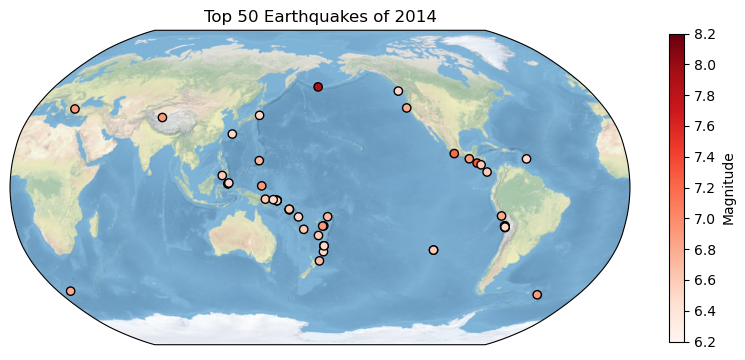

In [3]:
# 读取文件，并依据 mag 排序找到震级前五十个的地震信息
USGS_eqs = pd.read_csv('usgs_earthquakes.csv').sort_values(by='mag', ascending=False).iloc[0:50]

plt.figure(figsize=(10,5), dpi=100)

# 映射到 Robinson 投影, 并将投影的中心经度设置为 180°
proj = ccrs.Robinson(central_longitude=180)
ax = plt.axes(projection=proj)

# 添加基本的地形信息
ax.stock_img(zorder=0)

# 绘制地震数据点
scatter = ax.scatter(USGS_eqs['longitude'], 
                     USGS_eqs['latitude'], 
                     c=USGS_eqs['mag'], 
                     cmap='Reds', 
                     linewidth=1, 
                     edgecolors='black', 
                     vmin=6.2, 
                     vmax=8.2,
                     transform=ccrs.PlateCarree())
    
# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_ticks(np.arange(6.2, 8.3, 0.2))
cbar.set_label('Magnitude')

plt.title('Top 50 Earthquakes of 2014')
plt.show()

# 2. Explore a netCDF dataset

使用助教在群中发的Assignment03数据，https://send.cra.moe/file/kqxxVBzQlmRkqGdd/B7vOkVJNPzgF9lu5/S3%E4%BD%9C%E4%B8%9A%E6%95%B0%E6%8D%AE.zip

In [6]:
# 将所有netcdf4数据文件读取并合并
ds = xr.open_mfdataset('oco2_GEOS_L3CO2_month_*.nc4')
ds

<xarray.Dataset>
Dimensions:   (lat: 361, lon: 576, time: 86)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-01-16T12:00:00 ... 2022-02-15
Data variables:
    XCO2      (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
    XCO2PREC  (time, lat, lon) float64 dask.array<chunksize=(1, 361, 576), meta=np.ndarray>
Attributes: (12/25)
    RangeBeginningDate:             2017-08-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2017-08-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T12:04:33Z
    History:                        Original file generated: Tue Mar 15 12:04...
    ShortName:                      OCO2_GEOS_L3CO2_MONTH_10r
    LongName:                       OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    Title:                          OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    IdentifierProductDOI:           10.5067/BGFIODET3HZ8

## 2.1 Global map

Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box

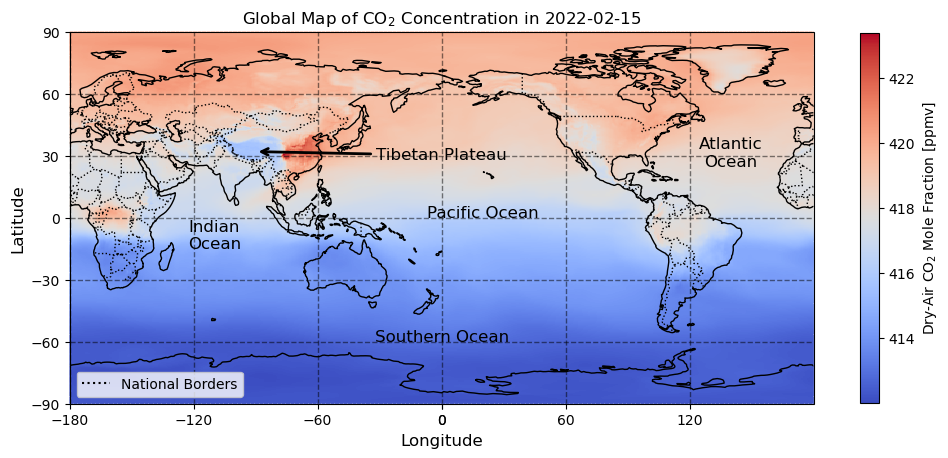

In [9]:
plt.figure(figsize=(12,6), dpi=100)

# Project
proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.axes(projection=proj)

# Plot and Colorbar 
(ds.XCO2[-1]*1e+6).plot(ax=ax,
                   transform=ccrs.PlateCarree(), 
                   cmap='coolwarm', 
                   cbar_kwargs={'label':'Dry-Air CO$_2$ Mole Fraction [ppmv]','shrink': 0.8})

# X label and ticks
ax.set_xlabel('Longitude', fontsize=12)
ax.set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())

# Y label and ticks
ax.set_ylabel('Latitude', fontsize=12)
ax.set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())

# Title
ax.set_title('Global Map of CO$_2$ Concentration in 2022-02-15')

# Gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.ylocator = mticker.FixedLocator(np.arange(-90, 90, 30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 60))

# Masks or Features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Legend
legend_line = mlines.Line2D([], [], color='black', linestyle=':', label='National Borders')
ax.legend(handles=[legend_line], loc='lower left')

# Annotations
ax.annotate('Tibetan Plateau', xy=(90, 32), xytext=(180, 28),
             arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
             transform=ccrs.Geodetic(), fontsize=12, ha='center')

# Text box
ax.text(200, 0, 'Pacific Ocean', transform=ccrs.Geodetic(), fontsize=12, ha='center', color='black')
ax.text(-40, 25, 'Atlantic\nOcean', transform=ccrs.Geodetic(), fontsize=12, ha='center', color='black')
ax.text(70, -15, 'Indian\nOcean', transform=ccrs.Geodetic(), fontsize=12, ha='center', color='black')
ax.text(180, -60, 'Southern Ocean', transform=ccrs.Geodetic(), fontsize=12, ha='center', color='black')

plt.show()

## 2.2 Regional map

Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box

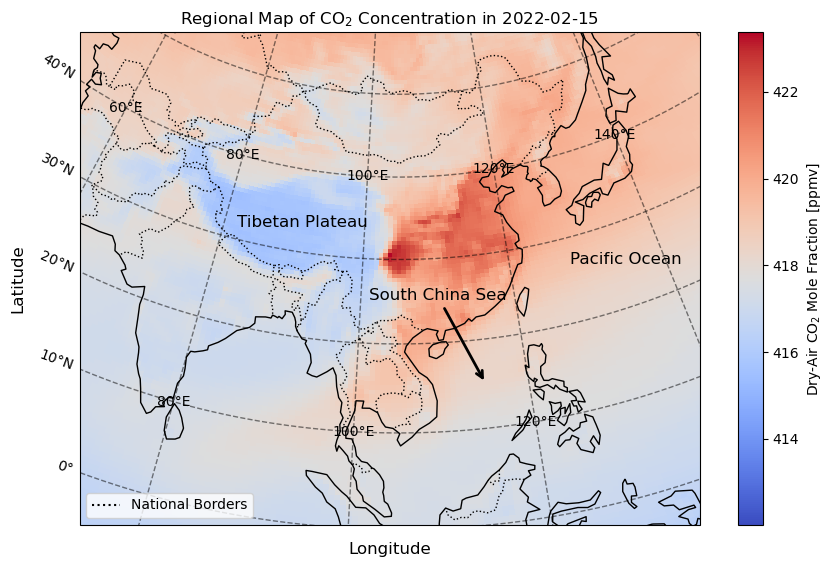

In [12]:
plt.figure(figsize=(10, 8))

# Project
proj = ccrs.LambertConformal(central_longitude=105)
ax = plt.axes(projection=proj)

# 设置地图边界
ax.set_extent([73, 135, 0, 54], crs=ccrs.PlateCarree())

# Plot and Colorbar 
(ds.XCO2[-1]*1e+6).plot(ax=ax,
                   transform=ccrs.PlateCarree(), 
                   cmap='coolwarm', 
                   cbar_kwargs={'label':'Dry-Air CO$_2$ Mole Fraction [ppmv]','shrink': 0.8})
# X label
# set_xlabel 只适用于 PlateCarree ，此处用text生成label
ax.text(0.5, -0.05, 'Longitude', transform=ax.transAxes, ha='center', va='center', fontsize=12)

# Y label
ax.text(-0.1, 0.5, 'Latitude', transform=ax.transAxes, ha='center', va='center', rotation=90, fontsize=12)

# Title
ax.set_title('Regional Map of CO$_2$ Concentration in 2022-02-15')

# Gridlines and x ticks, y ticks
## draw_labels 中涵盖了 X label and ticks 和 Y label and ticks 的信息
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Masks or Features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Legend
legend_line = mlines.Line2D([], [], color='black', linestyle=':', label='National Borders')
ax.legend(handles=[legend_line], loc='lower left')

# Annotations
ax.annotate('South China Sea', xy=(115, 15), xytext=(110, 25),
            arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
            transform=ccrs.Geodetic(), fontsize=12, ha='center')

# Text box
ax.text(135, 25, 'Pacific Ocean', transform=ccrs.Geodetic(), fontsize=12, ha='center', color='black')
ax.text(91, 33, 'Tibetan Plateau', transform=ccrs.Geodetic(), fontsize=12, ha='center', color='black')

plt.show()